## Importing dependencies for data preprocessing

In [1]:
import pandas as pd
import numpy as np

## Reading dataset

In [2]:
df = pd.read_csv('data.csv', sep='|')

In [3]:
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


## Separating attributes and target

In [4]:
x = df.drop(['legitimate','Name','md5'],axis='columns')
x

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,332,224,258,9,0,361984,115712,0,6135,4096,...,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18
3,332,224,258,9,0,585728,369152,0,451258,4096,...,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18
4,332,224,258,9,0,294912,247296,0,217381,4096,...,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,0,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,0,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,0,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,0,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0


### Shape of x

In [5]:
x.shape

(138047, 54)

In [6]:
y = df['legitimate'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Shape of y

In [7]:
y.shape

(138047,)

## Analysing features

In [8]:
i = 0
for col in x.columns:
    i += 1
    print(f"{i}) {col}")

1) Machine
2) SizeOfOptionalHeader
3) Characteristics
4) MajorLinkerVersion
5) MinorLinkerVersion
6) SizeOfCode
7) SizeOfInitializedData
8) SizeOfUninitializedData
9) AddressOfEntryPoint
10) BaseOfCode
11) BaseOfData
12) ImageBase
13) SectionAlignment
14) FileAlignment
15) MajorOperatingSystemVersion
16) MinorOperatingSystemVersion
17) MajorImageVersion
18) MinorImageVersion
19) MajorSubsystemVersion
20) MinorSubsystemVersion
21) SizeOfImage
22) SizeOfHeaders
23) CheckSum
24) Subsystem
25) DllCharacteristics
26) SizeOfStackReserve
27) SizeOfStackCommit
28) SizeOfHeapReserve
29) SizeOfHeapCommit
30) LoaderFlags
31) NumberOfRvaAndSizes
32) SectionsNb
33) SectionsMeanEntropy
34) SectionsMinEntropy
35) SectionsMaxEntropy
36) SectionsMeanRawsize
37) SectionsMinRawsize
38) SectionMaxRawsize
39) SectionsMeanVirtualsize
40) SectionsMinVirtualsize
41) SectionMaxVirtualsize
42) ImportsNbDLL
43) ImportsNb
44) ImportsNbOrdinal
45) ExportNb
46) ResourcesNb
47) ResourcesMeanEntropy
48) ResourcesMinE

## Researching important feature from 54 total features

In [9]:
# importing dependencies for feature selection

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [10]:
sel = SelectFromModel(ExtraTreesClassifier())
sel.fit(x,y)

SelectFromModel(estimator=ExtraTreesClassifier())

In [11]:
sel.get_support()

# It will return an array of boolean values.
# True for the features whose importance is greater than the mean importance 
# and False for the rest

array([ True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True])

In [12]:
selected_features = x.columns[sel.get_support()]

In [13]:
selected_features

Index(['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'ImageBase',
       'MajorOperatingSystemVersion', 'MajorSubsystemVersion', 'Subsystem',
       'DllCharacteristics', 'SectionsMeanEntropy', 'SectionsMaxEntropy',
       'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'VersionInformationSize'],
      dtype='object')

In [14]:
len(selected_features)

13

In [15]:
x_selft = sel.transform(x)
x_selft

array([[3.32000000e+02, 2.24000000e+02, 2.58000000e+02, ...,
        2.56884382e+00, 3.53793936e+00, 1.60000000e+01],
       [3.32000000e+02, 2.24000000e+02, 3.33000000e+03, ...,
        3.42074425e+00, 5.08017686e+00, 1.80000000e+01],
       [3.32000000e+02, 2.24000000e+02, 3.33000000e+03, ...,
        2.84644859e+00, 5.27181276e+00, 1.80000000e+01],
       ...,
       [3.32000000e+02, 2.24000000e+02, 2.58000000e+02, ...,
        2.61702640e+00, 7.99048737e+00, 1.40000000e+01],
       [3.32000000e+02, 2.24000000e+02, 3.31660000e+04, ...,
        2.06096405e+00, 4.73974433e+00, 0.00000000e+00],
       [3.32000000e+02, 2.24000000e+02, 2.58000000e+02, ...,
        1.98048202e+00, 6.11537436e+00, 0.00000000e+00]])

In [16]:
x_selft.shape

(138047, 13)

### The 13 most important features identified

In [17]:
i = 0
for feat in selected_features:
    i += 1
    print(f"{i}) {feat}")

1) Machine
2) SizeOfOptionalHeader
3) Characteristics
4) ImageBase
5) MajorOperatingSystemVersion
6) MajorSubsystemVersion
7) Subsystem
8) DllCharacteristics
9) SectionsMeanEntropy
10) SectionsMaxEntropy
11) ResourcesMinEntropy
12) ResourcesMaxEntropy
13) VersionInformationSize


## Splitting the data into train and test splits

In [18]:
# importing dependency for train and test split

from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_selft, y , test_size = 0.2)

### Shape of training and testing data

In [20]:
x_train.shape, x_test.shape

((110437, 13), (27610, 13))

In [21]:
y_train.shape, y_test.shape

((110437,), (27610,))

In [22]:
y_train = y_train.reshape(110437,)
y_test = y_test.reshape(27610,)

## Comparing classification algorithms on the dataset

In [23]:
# importing models from sklearn

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [24]:
algos = {
        "DecisionTree": DecisionTreeClassifier(max_depth=10),
        "RandomForest": RandomForestClassifier(n_estimators=50),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=50),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "GNB": GaussianNB()
    }

### Training and validating models

In [25]:
# importing dependencies for validating models

from sklearn.metrics import classification_report, confusion_matrix
import time

In [26]:
results = {}
cm = {}
tm = {}
for algo in algos:
    
    clf = algos[algo]
    start = time.time()
    clf.fit(x_train, y_train)
    end = time.time()
    train_time = round(end-start,10)
    start = time.time()
    y_pred = clf.predict(x_test)
    end = time.time()
    pred_time = round(end-start,10)
    tm[algo] = {
        'train_time' : train_time,
        'pred_time' : pred_time
    }
    prediction_time = round(end-start,2)
    print(f"Classification Report for {algo} model :\n")
    print(classification_report(y_test,y_pred,zero_division=0),"\n")
    
    score = clf.score(x_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    print("\n","-"*100,"\n")
    
    results[algo] = score
    cm[algo] = confusion_matrix(y_test,y_pred)

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% accuracy' % (winner, results[winner]*100))

Classification Report for DecisionTree model :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19388
           1       0.99      0.98      0.98      8222

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610
 

DecisionTree : 99.040203 %

 ---------------------------------------------------------------------------------------------------- 

Classification Report for RandomForest model :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19388
           1       0.99      0.99      0.99      8222

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610
 

RandomForest : 99.355306 %

 -------------------------------------------------------------------------------------

## Visualizing Results

In [27]:
# importing dependency for visualizing

import seaborn as sns
import matplotlib.pyplot as plt

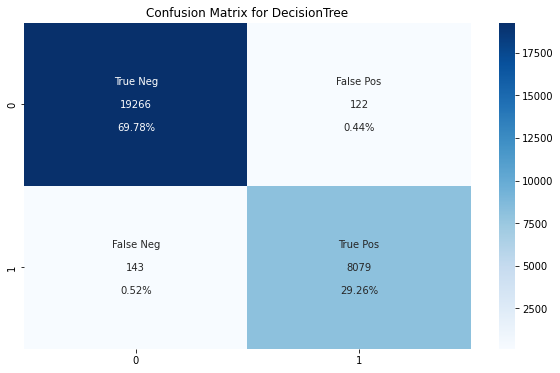

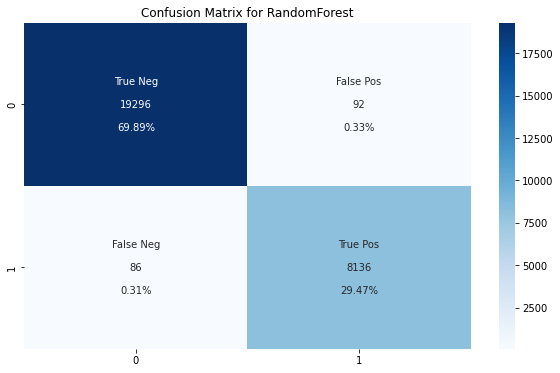

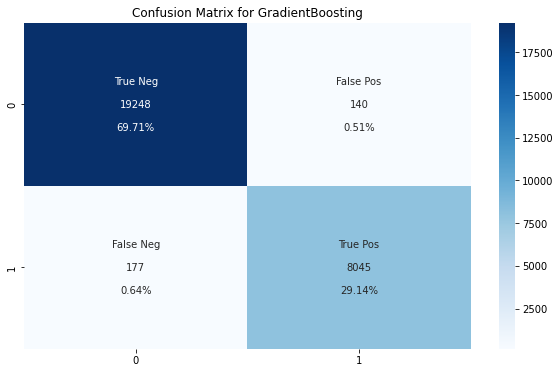

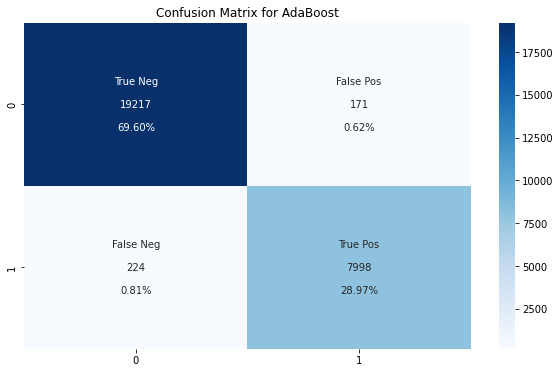

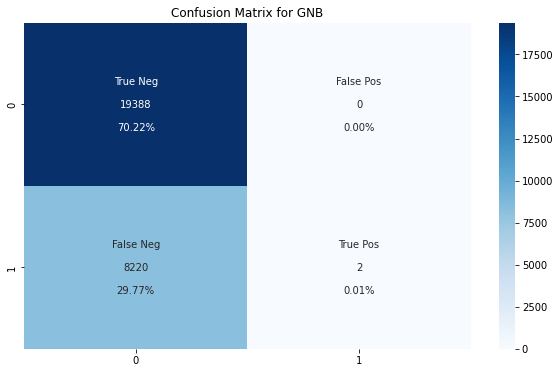

In [28]:
algo_names = [
        "DecisionTree",
        "RandomForest",
        "GradientBoosting",
        "AdaBoost",
        "GNB"
]
i=0
for cfm in cm:
    plt.figure(figsize=(10,6))
    plt.title(f"Confusion Matrix for {algo_names[i]}")
    i += 1
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm[cfm].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm[cfm].flatten()/np.sum(cm[cfm])]
    labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm[cfm], annot=labels, fmt='', cmap='Blues')

In [29]:
df[selected_features]

,Machine,SizeOfOptionalHeader,Characteristics,ImageBase,MajorOperatingSystemVersion,MajorSubsystemVersion,Subsystem,DllCharacteristics,SectionsMeanEntropy,SectionsMaxEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,VersionInformationSize
0,332,224,258,4194304.0,0,1,16,1024,5.766807,7.221051,2.568844,3.537939,16
1,332,224,3330,771751936.0,5,5,2,33088,4.839688,6.566909,3.420744,5.080177,18
2,332,224,3330,771751936.0,5,5,2,32832,6.409558,7.600957,2.846449,5.271813,18
3,332,224,258,771751936.0,5,5,2,33088,6.641731,7.594929,2.669314,6.400720,18
4,332,224,258,771751936.0,5,5,2,33088,6.252684,7.608305,3.421598,5.190603,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,4194304.0,5,5,2,33088,4.787797,6.516364,1.370260,7.677091,0
138043,332,224,33167,4194304.0,1,4,2,32768,2.256582,6.562232,2.031619,5.050074,15
138044,332,224,258,4194304.0,5,5,2,33088,5.659426,7.977423,2.617026,7.990487,14
138045,332,224,33166,4194304.0,1,4,2,0,3.012682,6.431188,2.060964,4.739744,0


In [30]:
features = [x for x in df[selected_features].columns]
features

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'ImageBase',
 'MajorOperatingSystemVersion',
 'MajorSubsystemVersion',
 'Subsystem',
 'DllCharacteristics',
 'SectionsMeanEntropy',
 'SectionsMaxEntropy',
 'ResourcesMinEntropy',
 'ResourcesMaxEntropy',
 'VersionInformationSize']

In [31]:
algos[winner]

RandomForestClassifier(n_estimators=50)

In [32]:
tm   
# train_time : time in seconds for training models on 110437 samples
# pred_time : time in seconds for classifying 27610 files

{'DecisionTree': {'train_time': 0.5461778641, 'pred_time': 0.0039980412},
 'RandomForest': {'train_time': 5.6142418385, 'pred_time': 0.1966073513},
 'GradientBoosting': {'train_time': 9.1185638905, 'pred_time': 0.0201683044},
 'AdaBoost': {'train_time': 9.3799464703, 'pred_time': 0.330167532},
 'GNB': {'train_time': 0.0475234985, 'pred_time': 0.0}}

## Saving model and important features

In [33]:
import pickle
with open('model_feats','wb') as f:
    pickle.dump([algos[winner],features],f)